In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Base Model

In [2]:
# Part 1: modeling bacteria population --> corresponds directly to smell released

# define logistic solution
def logistic(r,K,P0,ts):
    return K/(1+(K-P0)/P0*np.e**(-r*ts))

In [3]:
# initialize time array
ts=np.arange(0,61,1)
# initialize bacteria, in millions
P0=1
r=.25
K=4000
# run
bacteria=logistic(r,K,P0,ts)

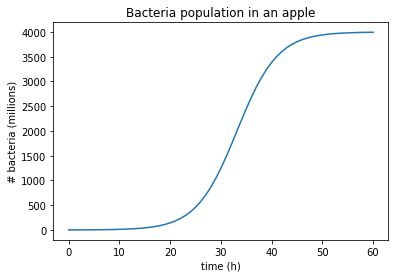

In [45]:
# plot
plt.plot(ts, bacteria)
plt.title("Bacteria population in an apple")
plt.ylabel("# bacteria (millions)")
plt.xlabel("time (h)");
# apples go bad in 1-3 days, I have hourly timesteps

In [74]:
# Part 2: random walk smell particles through room
# Whenever a smell particle reaches the door, I assume I attract a new fly from outside

# add new positions at each time step
def initialize_new_positions(n, positions, start):
    for new in range(n):
        positions.append(start.copy())

# walking and detecting the door
def walk(current_positions, door_positions, ysize, xsize):
    flycount=0
    for smell_position in current_positions:
        direction=random.choice([-1,1])
        axis=random.choice([-1,1])
        if axis==-1:
            smell_position[0]+=direction
            if abs(smell_position[0])>ysize:
                smell_position[0]-=2*direction
        if axis==1:
            smell_position[1]+=direction
            if abs(smell_position[1])>xsize:
                smell_position[1]-=2*direction
        # if the current smell molecule is at the door we attract a fly
        # and then we assume it diffuses away (it would be unrealistic to contain all smell molecules)
        for door_position in door_positions:
            if smell_position==door_position:
                flycount+=1
                current_positions.remove(smell_position)
    return flycount

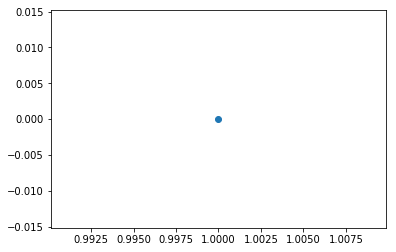

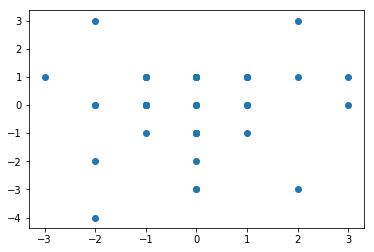

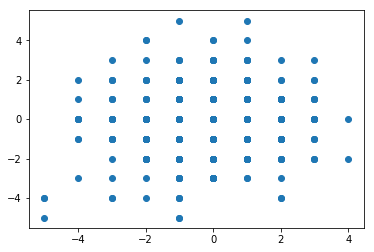

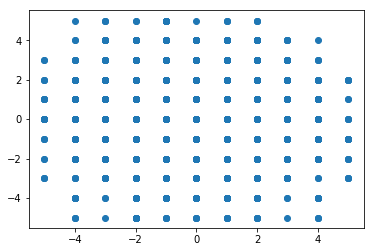

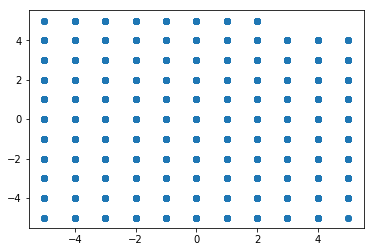

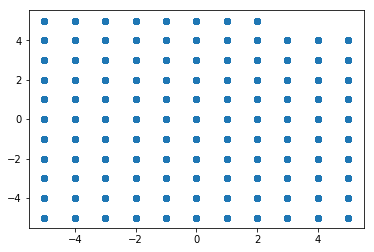

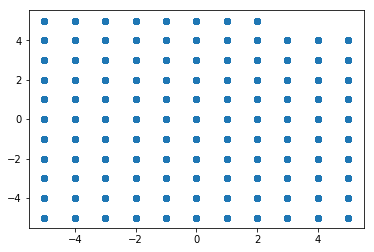

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   5.   0.
   2.   0.   2.   1.   3.   6.   1.   3.   5.   9.  10.  21.  17.  23.
  25.  34.  37.  47.  49.  70.  52.  68.  80.  78.  84. 122. 122. 136.
 138. 173. 194. 167. 196.]


In [75]:
# performing the random walk and plotting the locations of smell particles every 10h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 10 by 10 total) 
ysize=5
xsize=5
# start at center of the room
start=[0,0]
# door is at bottom right of the room
door_positions=[[5,5],[5,4],[5,3]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        ys = [x[0] for x in positions]
        xs = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)

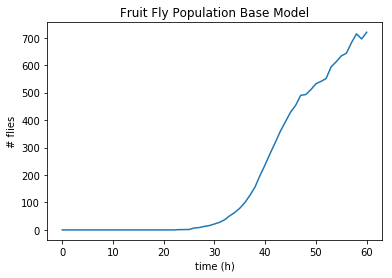

In [76]:
# Part 3: modified logistic differential equation to account for natural growth in fly population and new flies

# initializing fruit fly counts
P0=0
r=.25
K=350
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Base Model")
plt.ylabel("# flies")
plt.xlabel("time (h)");

# Wider Room (lengthening parallel to door)

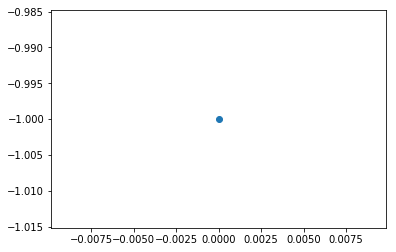

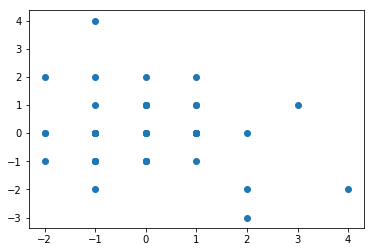

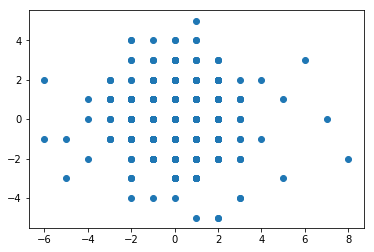

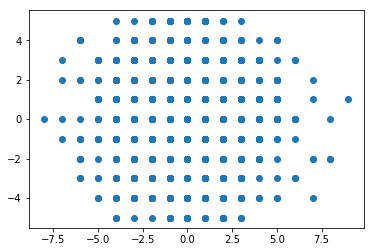

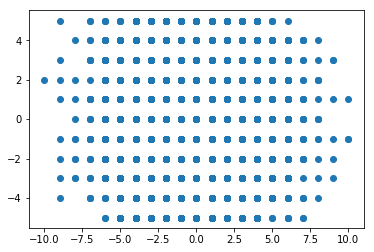

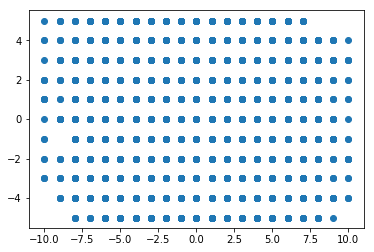

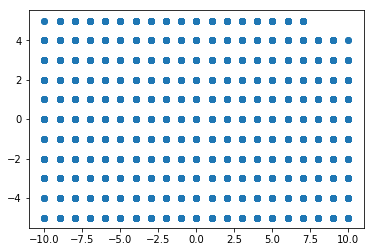

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  3.  0.  0.  0.  0.  2.  3.  2.  3.  1.  2.  4.  6.  3.  6.
  8.  6.  5. 11. 12. 15. 17.]


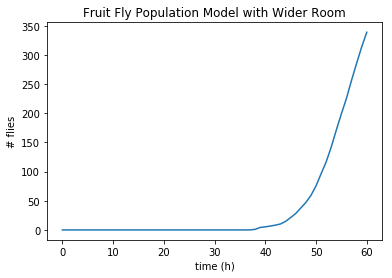

In [84]:
# performing the random walk and plotting the locations of smell particles every 10h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 10 by 20 total) 
ysize=5
xsize=10
# start at center of the room
start=[0,0]
# door is at bottom right of the room
door_positions=[[5,10],[5,9],[5,8]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        ys = [x[0] for x in positions]
        xs = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)

# initializing fruit fly counts
P0=0
r=.25
K=350
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Model with Wider Room")
plt.ylabel("# flies")
plt.xlabel("time (h)");

# Deeper Room (lengthening perpendicular to door)

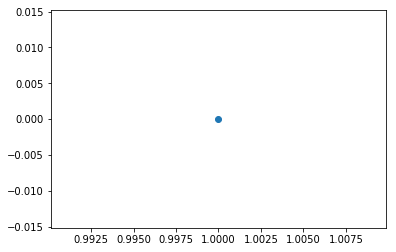

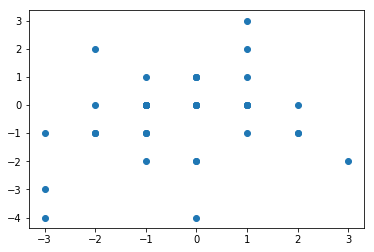

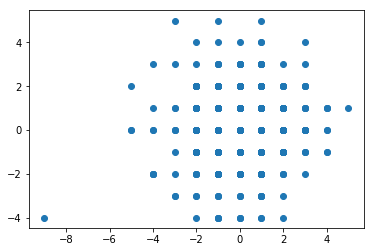

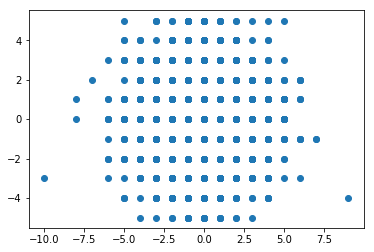

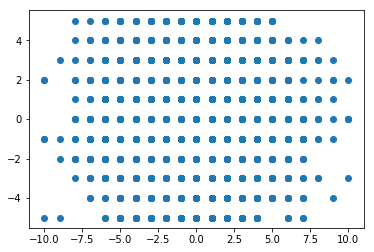

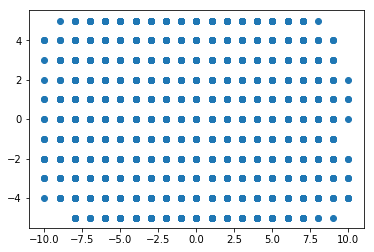

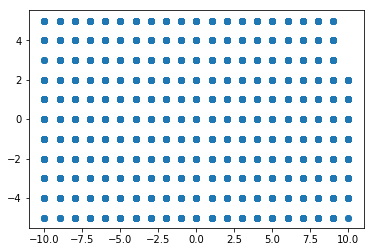

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  2.  0.  0.  0.  1.  1.  0.  0.  1.  4.  0.  3.  3.  2.  3.  5.
  5.  9.  7.  7.  3. 14.  9.]


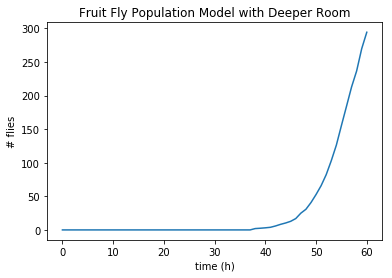

In [85]:
# performing the random walk and plotting the locations of smell particles every 10h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 20 by 10 total) 
ysize=10
xsize=5
# start at center of the room
start=[0,0]
# door is at bottom right of the room
door_positions=[[10,5],[10,4],[10,3]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        xs = [x[0] for x in positions]
        ys = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)

# initializing fruit fly counts
P0=0
r=.25
K=350
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Model with Deeper Room")
plt.ylabel("# flies")
plt.xlabel("time (h)");

# Larger Room

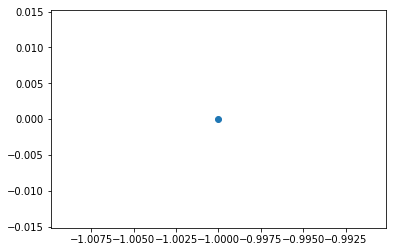

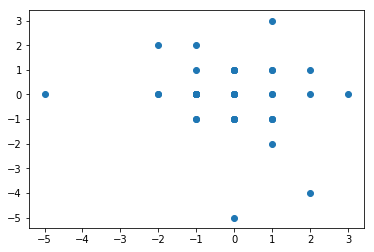

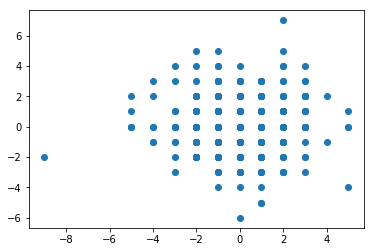

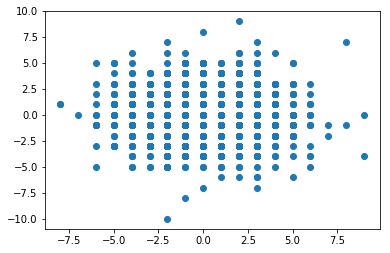

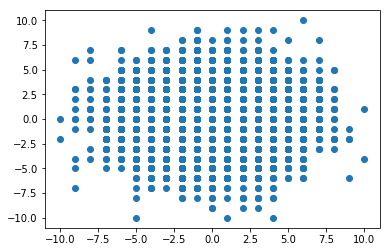

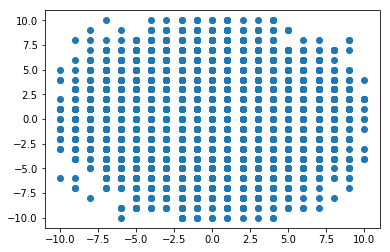

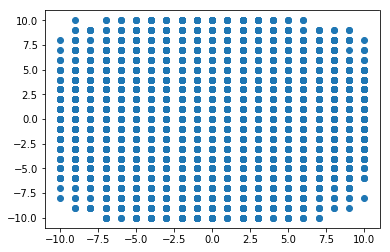

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 0.]


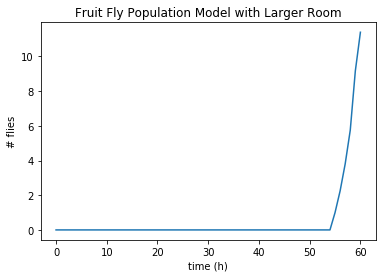

In [86]:
# performing the random walk and plotting the locations of smell particles every 10h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 20 by 20 total) 
ysize=10
xsize=10
# start at center of the room
start=[0,0]
# door is at bottom right of the room
door_positions=[[10,10],[10,9],[10,8]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        ys = [x[0] for x in positions]
        xs = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)

# initializing fruit fly counts
P0=0
r=.25
K=350
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Model with Larger Room")
plt.ylabel("# flies")
plt.xlabel("time (h)");

# Smaller Room (pantry)

Due to the nature of approximations/assumptions this starts to reach a balance then begins blowing up. 

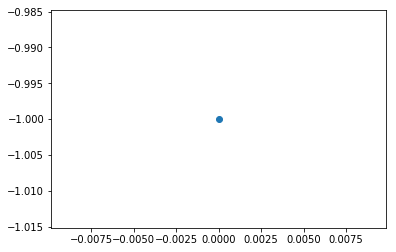

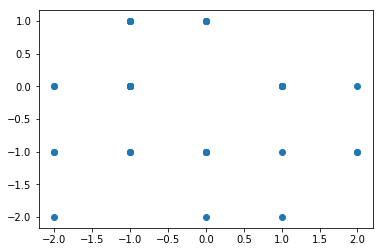

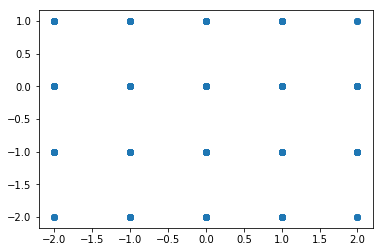

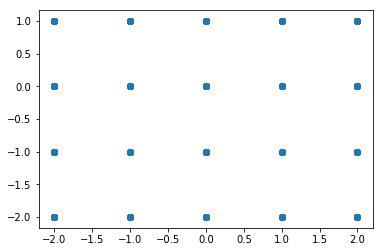

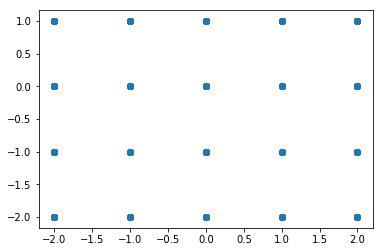

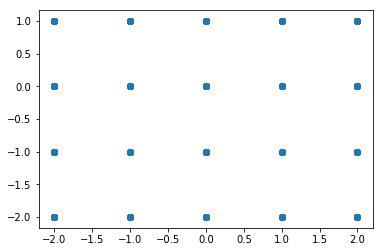

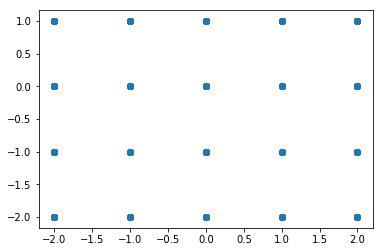

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 1.000e+00 3.000e+00 4.000e+00 7.000e+00 3.000e+00
 5.000e+00 8.000e+00 7.000e+00 1.100e+01 1.900e+01 1.600e+01 2.600e+01
 3.600e+01 3.400e+01 4.900e+01 7.300e+01 8.500e+01 9.900e+01 1.210e+02
 1.690e+02 1.980e+02 2.450e+02 2.610e+02 3.620e+02 4.000e+02 5.020e+02
 5.780e+02 7.210e+02 7.390e+02 9.310e+02 9.870e+02 1.093e+03 1.232e+03
 1.335e+03 1.416e+03 1.545e+03 1.625e+03 1.662e+03 1.810e+03 1.907e+03
 2.002e+03 1.983e+03 2.023e+03 2.195e+03 2.315e+03 2.313e+03 2.359e+03
 2.364e+03 2.489e+03 2.460e+03 2.569e+03 2.611e+03]


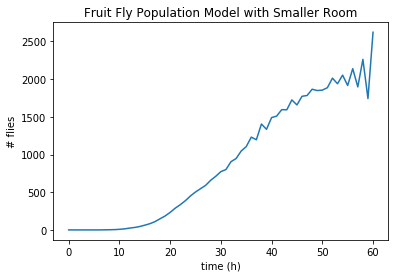

In [87]:
# performing the random walk and plotting the locations of smell particles every 1h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 4 by 4 total) 
ysize=2
xsize=2
# start at center of the room
start=[0,0]
# door is at bottom side of room
door_positions=[[2,2],[2,1],[2,0],[2,-1],[2,-2]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        ys = [x[0] for x in positions]
        xs = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)

# initializing fruit fly counts
P0=0
r=.25
K=350
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Model with Smaller Room")
plt.ylabel("# flies")
plt.xlabel("time (h)");

# Fruit placed in corner furthest from door

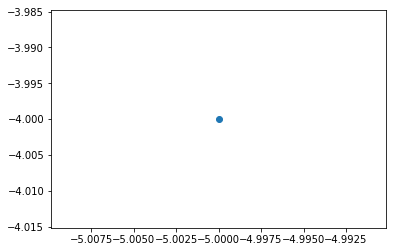

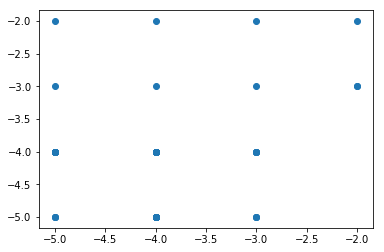

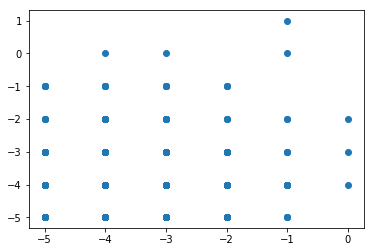

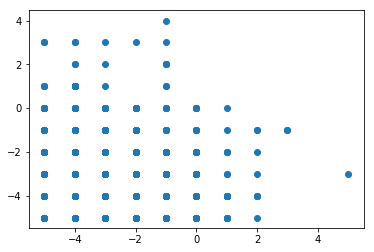

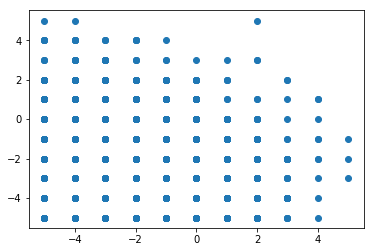

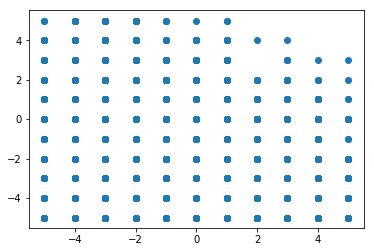

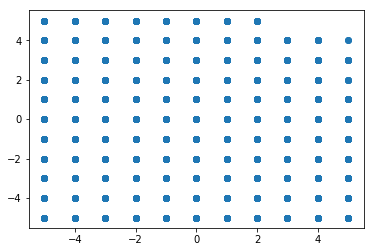

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 2. 3. 4. 4.]


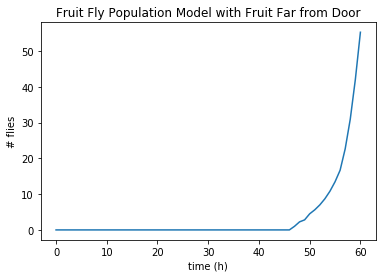

In [88]:
# performing the random walk and plotting the locations of smell particles every 10h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 10 by 10 total) 
ysize=5
xsize=5
# start at corner of room furthest from door
start=[-5,-5]
# door is at bottom right of the room
door_positions=[[5,5],[5,4],[5,3]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        ys = [x[0] for x in positions]
        xs = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)

# initializing fruit fly counts
P0=0
r=.25
K=350
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Model with Fruit Far from Door")
plt.ylabel("# flies")
plt.xlabel("time (h)");

# Fruit placed next to door

Due to the nature of approximations/assumptions this blows up when the fruit is too close! Too many smell particles are hitting the door and attracting an unrealistic number of flies at once. Potential future refinements can include limiting the rate of flies that can be attracted from outside. 

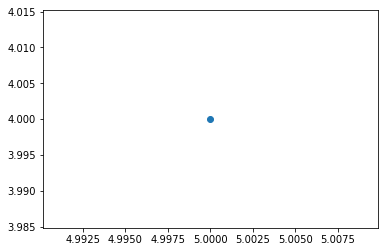

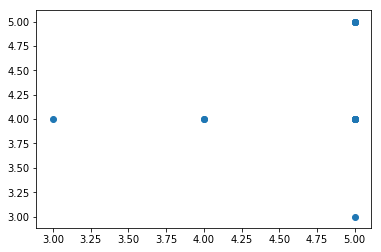

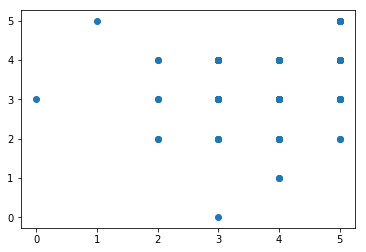

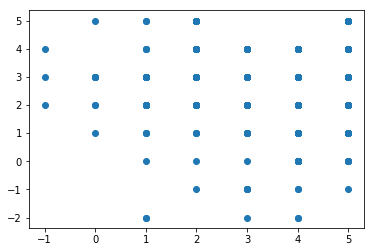

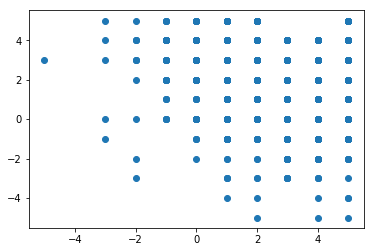

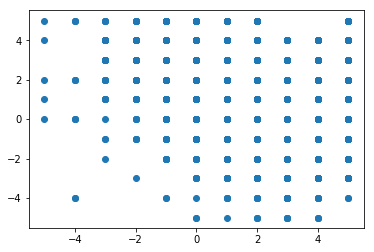

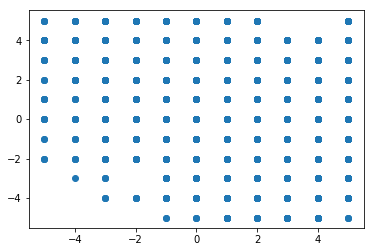

[0.000e+00 0.000e+00 2.000e+00 1.000e+00 0.000e+00 2.000e+00 2.000e+00
 4.000e+00 5.000e+00 5.000e+00 1.000e+01 1.100e+01 8.000e+00 1.600e+01
 1.900e+01 2.100e+01 3.100e+01 4.500e+01 5.100e+01 7.100e+01 8.400e+01
 1.060e+02 1.350e+02 1.750e+02 2.070e+02 2.820e+02 3.780e+02 4.200e+02
 5.270e+02 6.250e+02 7.760e+02 9.270e+02 1.134e+03 1.286e+03 1.491e+03
 1.666e+03 1.908e+03 2.073e+03 2.204e+03 2.414e+03 2.474e+03 2.662e+03
 2.745e+03 2.857e+03 2.933e+03 3.068e+03 3.080e+03 3.129e+03 3.097e+03
 3.257e+03 3.283e+03 3.277e+03 3.317e+03 3.276e+03 3.338e+03 3.388e+03
 3.309e+03 3.450e+03 3.355e+03 3.407e+03 3.377e+03]


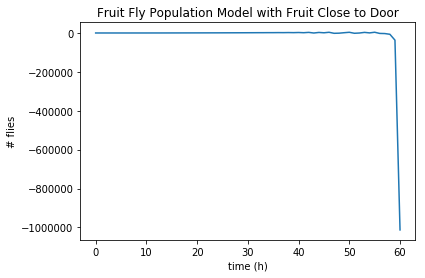

In [89]:
# performing the random walk and plotting the locations of smell particles every 10h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 10 by 10 total) 
ysize=5
xsize=5
# start at corner of room with door
start=[5,5]
# door is at bottom right of the room
door_positions=[[5,5],[5,4],[5,3]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        ys = [x[0] for x in positions]
        xs = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)

# initializing fruit fly counts
P0=0
r=.25
K=350
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Model with Fruit Close to Door")
plt.ylabel("# flies")
plt.xlabel("time (h)");

# Double the fruit

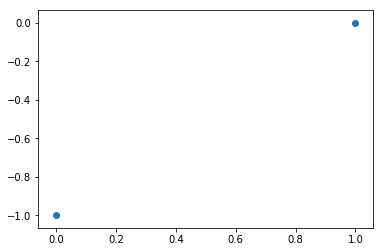

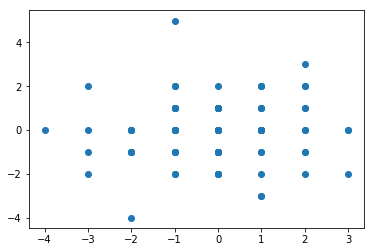

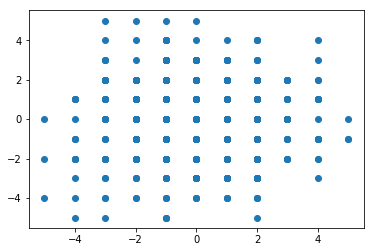

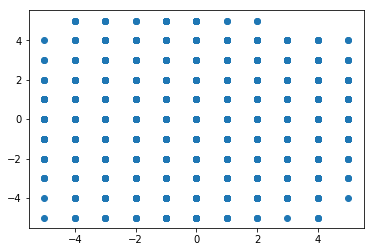

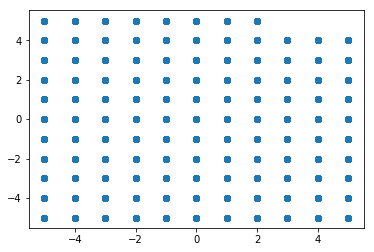

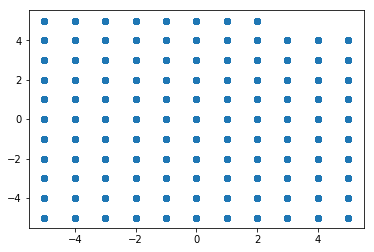

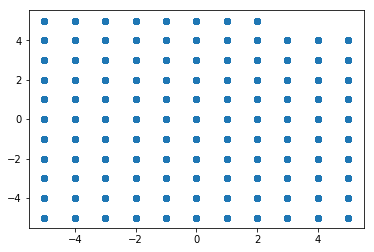

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   1.   2.   4.   4.
   2.   4.   4.   3.   3.   6.   7.  14.  13.  17.  21.  27.  42.  50.
  60.  65.  75.  99. 116. 100. 113. 139. 160. 199. 218. 245. 224. 274.
 301. 315. 325. 365. 432.]


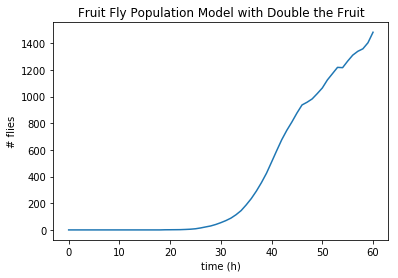

In [90]:
# double the fruit means double the bacteria at each time step, assuming that bacteria can't cross from apple to apple

# performing the random walk and plotting the locations of smell particles every 10h

# initializing array for positions of all smell particles
positions=[]

# size of room in feet, from the center (this room is 10 by 10 total) 
ysize=5
xsize=5
# start at center of the room
start=[0,0]
# door is at bottom right of the room
door_positions=[[5,5],[5,4],[5,3]]

# initialize new flies to save
newflies=np.zeros(len(ts))
for hour in ts:
    n=bacteria[hour]*2 # bacteria double because double the fruit
    initialize_new_positions(int(n), positions, start)
    newflies[hour]=walk(positions, door_positions, ysize, xsize)
    if hour%10==0:
        ys = [x[0] for x in positions]
        xs = [x[1] for x in positions]
        plt.scatter(xs, ys)
        plt.show()

print(newflies)


# double fruit means double stuff for flies to eat means double carrying capacity

# initializing fruit fly counts
P0=0
r=.25
K=700
ffpop=np.zeros(len(ts))
ffpop[0]=P0

# perform numerical estimation of differential
for hour in range(len(ts)):
    if hour==0:
        continue
    ffpop[hour]=ffpop[hour-1]+r*ffpop[hour-1]*(1-ffpop[hour-1]/K)+newflies[hour]

plt.plot(ts,ffpop)
plt.title("Fruit Fly Population Model with Double the Fruit")
plt.ylabel("# flies")
plt.xlabel("time (h)");
